# Natural Language Processing for Sentiment Analysis

In this project, I will explore some concepts of sentiment analysis taking advantage of NLP tools. The idea is to train a model to judge whether a written text has content that expresses satisfaction or dissatisfaction with a particular service.

The dataset I chose for this project contains Yelp's reviews of different businesses by different customers.

The dataset is composed by:
- a text containing the review written by the customer;
- a score between 1 and 5 stars that summarizes how the customer was satisfied with the particular service;
- "cool", "useful" and "funny" counters taking into account the impression other users had about a review.

The goal of the NLP model is to correctly predict the number of stars awarded based on the review.

## Data Import and Analysis

In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
yelp_df = pd.read_csv("yelp.csv")
yelp_df.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In the following, the **general information** regarding the dataframe is shown. As you can see, there are no null data: in order to proceed, it is not required to perform data cleansing on missing values.

In [4]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


The **statistical properties** of the dataset are now highlighted. We can see that the number of occurrences is 10000. Using a relatively small dataset, it would be reasonable to split it into a test subset of about 30% of the whole size.

In [5]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


To perform further analysis on the datset, I am going to create a new column containing the **length** of the review text.

In [6]:
yelp_df['text length'] = yelp_df['text'].apply(len)
mean_length = yelp_df['text length'].mean()
print('The average length of a review is %i characters.' %mean_length)

The average length of a review is 710 characters.


## Data Visualization

We start visualizing the length of the reviews divided by the number of assigned stars.
- Histograms of the text's length by the assigned number of stars are shown in the first figure.
- In the second figure, again separated by the number of stars, the quantiles of the text length distribution are represented.

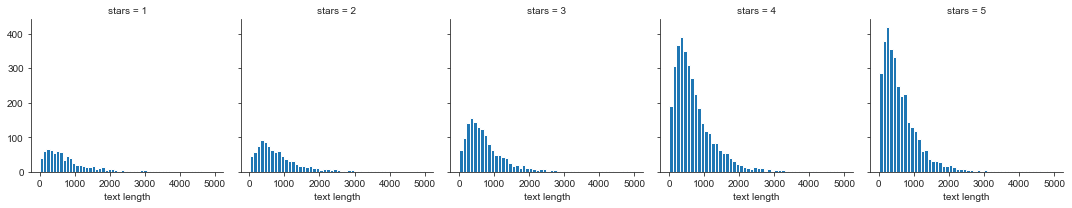

In [7]:
sns.set_style('ticks')
stars_count = sns.FacetGrid(yelp_df, col='stars')
stars_count.map(plt.hist, 'text length', bins=50)
plt.show()

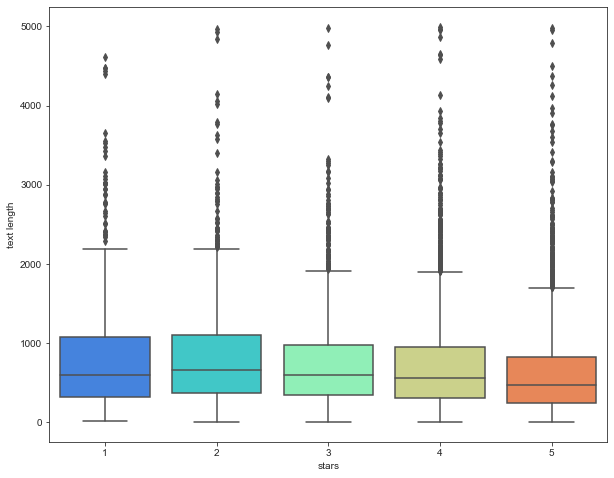

In [8]:
plt.figure(figsize=(10,8))
sns.boxplot(x='stars', y='text length', data=yelp_df, palette='rainbow')
plt.show()

Looking at the graphs it seems that on average longer texts are associated with worse ratings. However, because there are more reviews with 4 or 5 stars, these have more data with particularly long texts.

A histogram representing the number of occurrences that received a given number of stars is now shown.

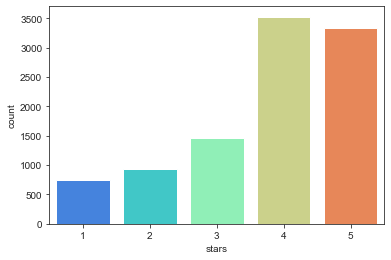

In [9]:
sns.countplot(x='stars', data=yelp_df, palette='rainbow')
plt.show()

I now proceed to consider the feedback entered by users to the reviews, again grouping them by number of stars awarded.

Statistical properties are reported first, then correlations are investigated using a heatmap.

In [10]:
feedback = yelp_df.groupby('stars').mean()
feedback

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


From the table, it appears that, on average, reviews with a higher number of stars receive more "cool" feedback. The opposite happens for "useful" and "funny" feedback.

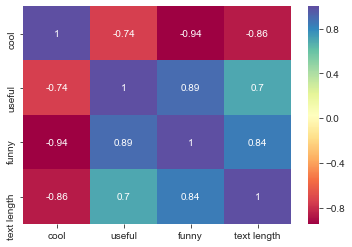

In [11]:
feedback_corr = feedback.corr()
ax = sns.heatmap(feedback_corr, cmap='Spectral', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

## Creation of Subsets for NLP 

We start by extracting from the dataset the training properties $x$ and the label $y$. 

The text must be processed with the function **CountVectorizer** to make the data useful for the model.

In [25]:
x = yelp_df['text']
y = yelp_df['stars']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [27]:
x = cv.fit_transform(x)

The train and test subsets are now created.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

## Training of the Model

The model I choose for this project is the Multinomial Naive Bayes. This is the supervised learning model most frequently used in the context of written text categorization.

Multinomial Naive Bayes algorithm is a probabilistic learning method based on the Bayes theorem. It calculates the probability of each tag for a given sample and then gives the tag with the highest probability as output.

In [36]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [37]:
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Prediction and Evaluation

In the following, I create a confusion matrix to evaluete the accuracy of the model.

In [38]:
predictions = mnb.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
print(confusion_matrix(y_test, predictions))

[[ 57  35  12  79  37]
 [ 12  20  33 180  28]
 [  6   8  36 350  43]
 [  6   4  21 775 258]
 [  5   5   9 446 535]]


In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.66      0.26      0.37       220
           2       0.28      0.07      0.12       273
           3       0.32      0.08      0.13       443
           4       0.42      0.73      0.54      1064
           5       0.59      0.54      0.56      1000

    accuracy                           0.47      3000
   macro avg       0.46      0.34      0.34      3000
weighted avg       0.47      0.47      0.43      3000



As we can see, the model didn't perfom well, expecially for reviews in the range [2 - 4].

To improve the accuracy of the model, it is possible to work in different directions:
- perform text processing;
- consider a dataset composed exclusively of opposing reviews (1 or 5 stars);
- vary the additive smoothing parameter $\alpha$.

## Using Text Processing

In [44]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [45]:
pipeline = Pipeline([('bow', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('model', MultinomialNB())])

In [48]:
x = yelp_df['text']
y = yelp_df['stars']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [50]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [52]:
predictions = pipeline.predict(x_test)

In [53]:
print(confusion_matrix(y_test, predictions))

[[  0   0   0 187  33]
 [  0   0   0 266   7]
 [  0   0   1 422  20]
 [  0   0   0 974  90]
 [  0   0   0 708 292]]


From the confusion matrix we can altready observe that the text processing with the **term-frequency times inverse document-frequency function** performed worse.

## Reduced Dataset

In [54]:
yelp_df_reduced = yelp_df[(yelp_df['stars']==1) | (yelp_df['stars']==5)]
x = yelp_df_reduced['text']
y = yelp_df_reduced['stars']
cv_reduced = CountVectorizer()
x = cv_reduced.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [55]:
mnb_reduced = MultinomialNB()

In [56]:
mnb_reduced.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
predictions = mnb_reduced.predict(x_test)

In [59]:
print(confusion_matrix(y_test, predictions))

[[159  69]
 [ 22 976]]


In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



The choice to consider only extreme ratings made the model more robust. However, it should be emphasized that in this way the model is unable to make predictions for intermediate ratings.

## Laplace - Lidstone smoothing < 1

In [61]:
x = yelp_df['text']
y = yelp_df['stars']
cv_aplha = CountVectorizer()
x = cv_aplha.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [65]:
mnb_alpha = MultinomialNB(alpha=0.5)

In [67]:
mnb_alpha.fit(x_train, y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

In [68]:
predictions = mnb_alpha.predict(x_test)

In [69]:
print(confusion_matrix(y_test, predictions))

[[ 98  50  17  31  24]
 [ 29  57  78  86  23]
 [ 11  30 107 247  48]
 [ 14  15  80 669 286]
 [ 20  15  26 384 555]]


In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.57      0.45      0.50       220
           2       0.34      0.21      0.26       273
           3       0.35      0.24      0.28       443
           4       0.47      0.63      0.54      1064
           5       0.59      0.56      0.57      1000

    accuracy                           0.50      3000
   macro avg       0.46      0.42      0.43      3000
weighted avg       0.49      0.50      0.48      3000



We observe how the choice to decrease the parameter $\alpha$ resulted in an overall deterioration in the accuracy of the model.

## Conclusions

The purpose of this project was to become familiar with natural language processing for sentiment analysis through the Scikit-learn library. From testing, I found that NLP performs best when feelings are classified in a binary manner: the chosen model, the Multinomial Naive Bayes, has difficulty distinguishing between a progressive range of emotions.